## Load Needed Libraries

In [507]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline


## Generate Data

#### We will generate a data with x from 0 to 8. Y = 1 + 3X. Then we will add some gaussian noise to it.

In [195]:
num_of_points = 100
num_dim = 1
X = 8*np.random.rand(num_of_points,num_dim)
X = np.c_[np.ones((num_of_points,num_dim)),X]
print(X.shape)
thetas_best = np.array([1,3])
print(thetas_best.shape)
Y = X.dot(thetas_best) 
Y = Y.reshape(num_of_points,num_dim)
Y = Y +np.random.randn(num_of_points,num_dim)
print(y.shape)


(100, 2)
(2,)
(100, 1)


Text(0,0.5,'Y')

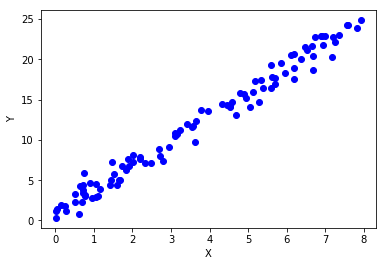

In [196]:
plt.plot(X[:,1],Y,'bo')
plt.xlabel('X')
plt.ylabel("Y")


In [198]:
#Objective: the function computes the cost function for linear regression using mean square error
#Input:
#Theta: the weight coefficents for linear regression
#x: the feature values  for linear regression
#y: the real value of predicted output
#Output:
#The root mean square error value
def cost_function(theta, x, y):
    y_hat = x.dot(theta)
    m = x.size
    mean_error = (1/2*m)*np.sum(np.square((y_hat-y)))
    return mean_error

In [199]:
#Input:
#Theta: the weight coefficents for linear regression 
#X: the feature values for linear regression
#learning_rate: the learning rate for gradient descent
def gradient_descent(theta, x, y, learning_rate = 0.01, iterations = 1000):
    m = x.size
    thetas = np.zeros((iterations, theta.shape[0]))
    costs = np.zeros(iterations)
    for i in range(iterations):
        y_hat = x.dot(theta)
        theta = theta - (learning_rate/m)*x.T.dot((y_hat-y))
        thetas[i,:] =theta.T
        costs[i] = cost_function(theta, x, y)
    return theta, thetas, costs

In [200]:
#Input:
#x: features
#y: observed values
#Output:
#theta: linear regression coefficients 
def normal_eguation_method(x,y):
    theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return theta

## Fitting linear regression using Normal Equations

In [508]:
start = time.time()
theta = normal_eguation_method(X,Y)
end = time.time()
print("The total time taken for executing the normal equations methods is: ",end - start)

The total time taken for executing the normal equations methods is:  0.7131731510162354


In [202]:
theta

array([[0.93073497],
       [2.99542427]])

Text(0,0.5,'Y')

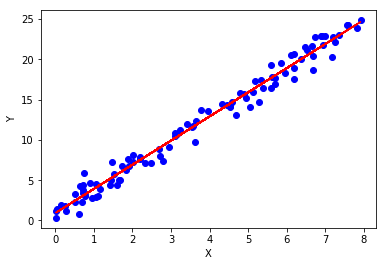

In [203]:
plt.plot(X[:,1], Y, 'bo')
plt.plot(X[:,1], X.dot(theta), '-',color='red')
plt.xlabel('X')
plt.ylabel("Y")


### Fitting linear regression using gradient descent

In [512]:
theta_initial = np.random.randn(2,1)
start = time.time()

theta,thetas,costs = gradient_descent(theta_initial, X,Y, 0.1,1500)
end = time.time()
print("The total time taken for executing the gradient descent methods is: ",end - start)
print(theta)

The total time taken for executing the gradient descent methods is:  0.03023982048034668
[[0.93073497]
 [2.99542427]]


In [503]:
theta_initial = np.array([-7, -8]).reshape(2,1)

theta_initial


array([[-7],
       [-8]])

Text(0,0.5,'Y')

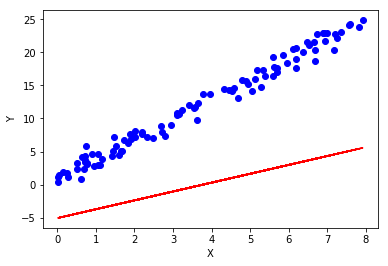

In [504]:
plt.plot(X[:,1], Y, 'bo')
plt.plot(X[:,1], X.dot(theta), '-',color='red')
plt.xlabel('X')
plt.ylabel("Y")


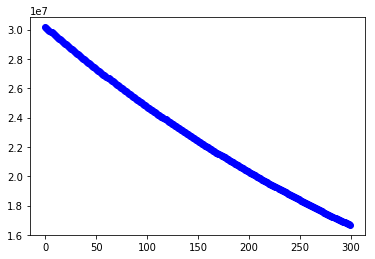

In [505]:
plt.plot(costs[0:300], 'bo')


## Visualizing Gradient Descent

In [487]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))


In [488]:
#Computing the cost function for each theta combination
zs = np.array(  [cost_function(np.array([t0,t1]),X, Y) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )


In [489]:
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


In [490]:
#Angles needed for quiver plot
anglesx = np.array(thetas[:,0])[1:] - np.array(thetas[:,0])[:-1]
anglesy = np.array(thetas[:,1])[1:] - np.array(thetas[:,1])[:-1]


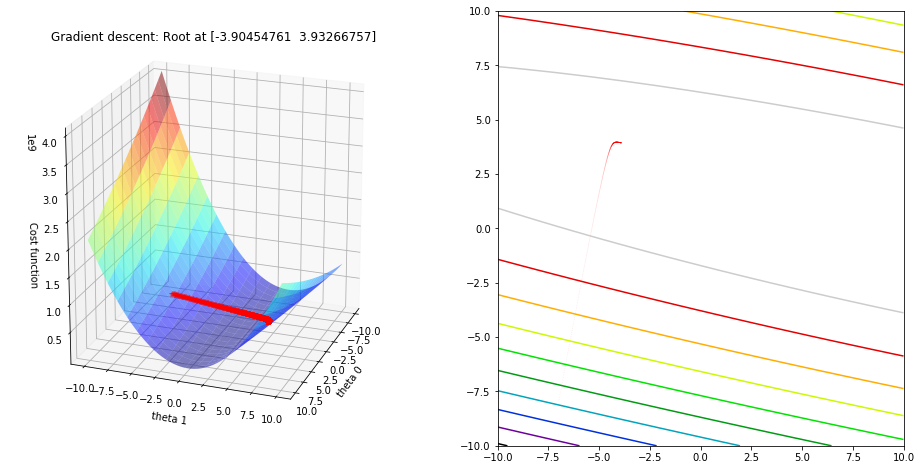

In [497]:
theta_initial = np.array([-7, -8]).reshape(2,1)
theta,thetas,costs = gradient_descent(theta_initial, X,Y, 0.001,1000)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]
J_history = costs
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta.ravel()))
ax.view_init(20,20)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 10, cmap = 'nipy_spectral_r', origin = 'lower')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .1)

plt.show()
